<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>CAR PRICE PREDICTION
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [62]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of Superstore</strong></h1>
</div>


In [63]:
file_path = (r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\05-CarPrice_DataSet.csv")
df =pd.read_csv(file_path)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [65]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [66]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [67]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 205 and Number of Columns: 26


In [68]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
59,60,1,mazda 626,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845.0
147,148,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,...,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198.0
146,147,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0
25,26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
85,86,1,mitsubishi montero,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989.0


In [70]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [71]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>


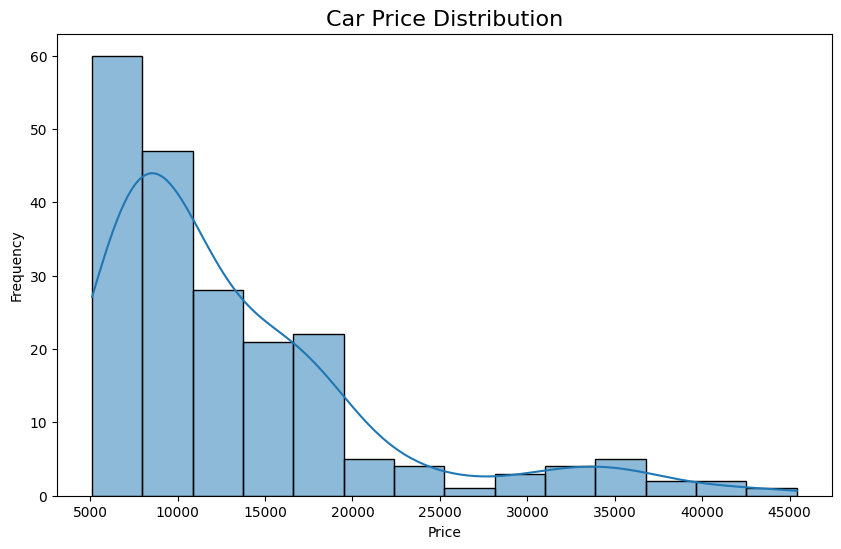

In [72]:
# Drop non-numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Car Price Distribution', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> Correlation Heatmap</strong> </h1>
</center>

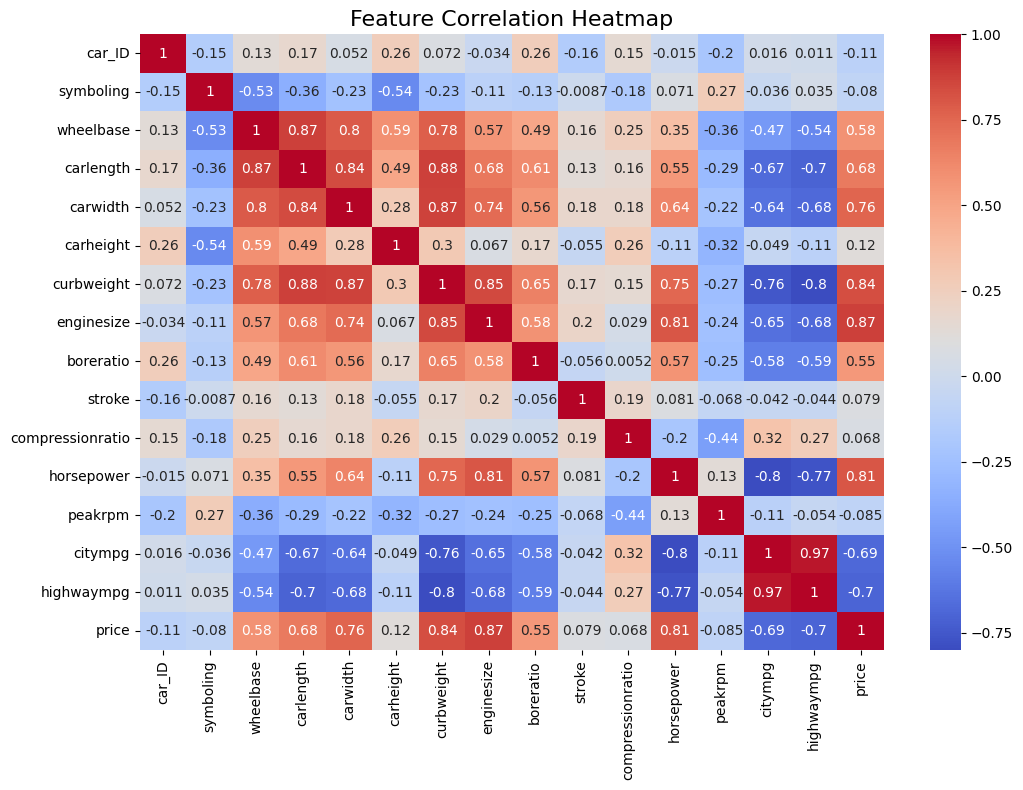

In [73]:
# Correlation Heatmap to find relationships between numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

<center>
      <h1 style="font-size: 36px;"><strong>Number of Cylinders vs Car Price</strong> </h1>
</center>

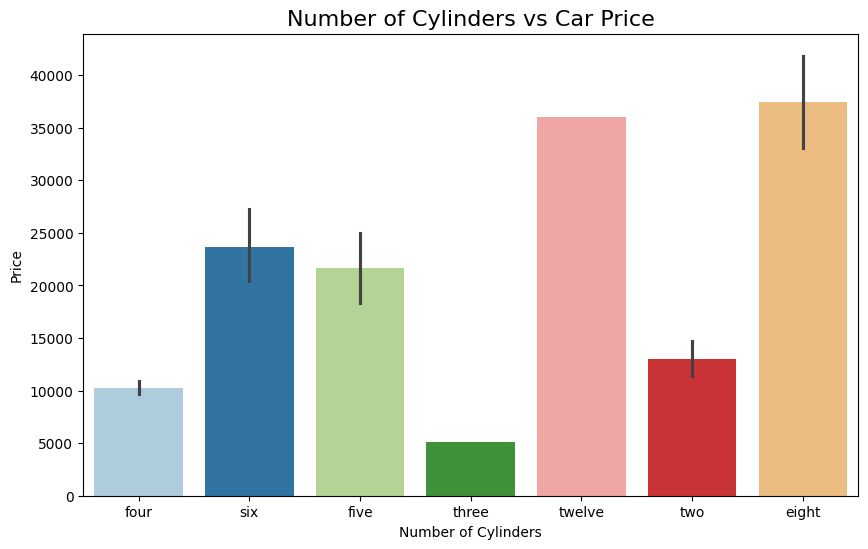

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cylindernumber', y='price', data=df, palette='Paired')
plt.title('Number of Cylinders vs Car Price', fontsize=16)
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> </strong> </h1>
</center>

<center>
      <h1 style="font-size: 36px;"><strong> Engine Size vs Car Price</strong> </h1>
</center>

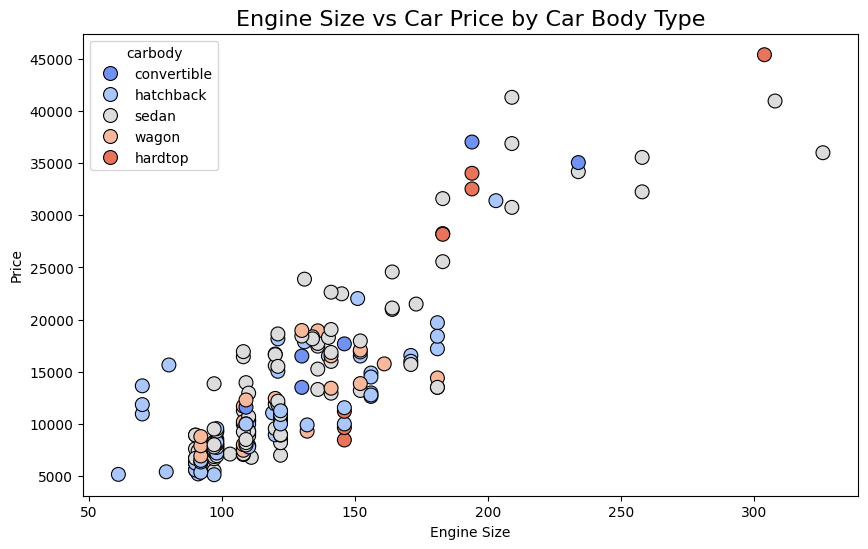

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='price', data=df, hue='carbody', palette='coolwarm', s=100, edgecolor='k')
plt.title('Engine Size vs Car Price by Car Body Type', fontsize=16)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> Fuel Type VS Price</strong> </h1>
</center>

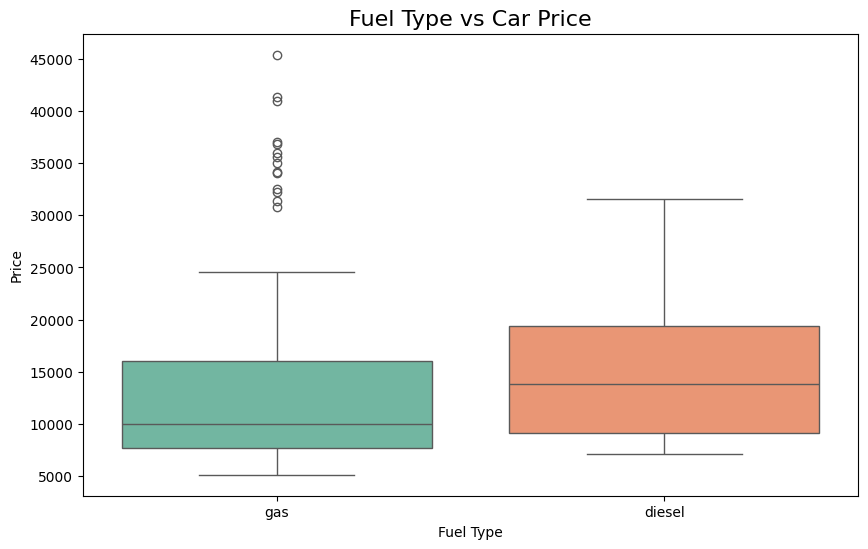

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fueltype', y='price', data=df, palette='Set2')
plt.title('Fuel Type vs Car Price', fontsize=16)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> Drive Wheel Vs Car Price</strong> </h1>
</center>

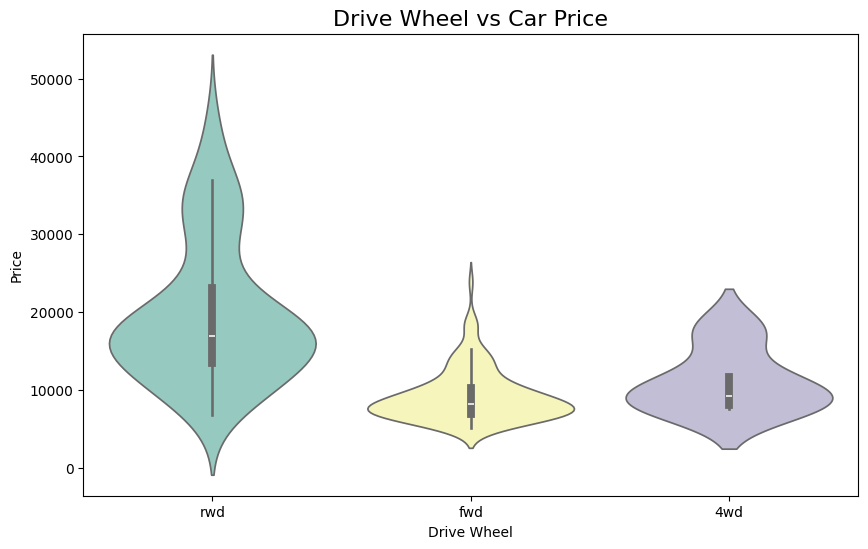

In [77]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='drivewheel', y='price', data=df, palette='Set3')
plt.title('Drive Wheel vs Car Price', fontsize=16)
plt.xlabel('Drive Wheel')
plt.ylabel('Price')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Feature Engineering</strong></h1>
</div>


In [78]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype'], drop_first=True)

# Convert CarName to just the brand
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0])
df = pd.get_dummies(df, columns=['CarBrand'], drop_first=True)

# Drop unnecessary columns
df = df.drop(['CarName', 'symboling'], axis=1)


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Building the Machine Learning Model</strong></h1>
</div>


In [79]:
# Convert categorical columns to one-hot encoded features
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding for all categorical columns

# Define the target variable and features
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict car prices for the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R^2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared Score: {r2}')


Root Mean Squared Error (RMSE): 1844.190620684011
R-squared Score: 0.956918345334811


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Model Evaluation and Insights</strong></h1>
</div>


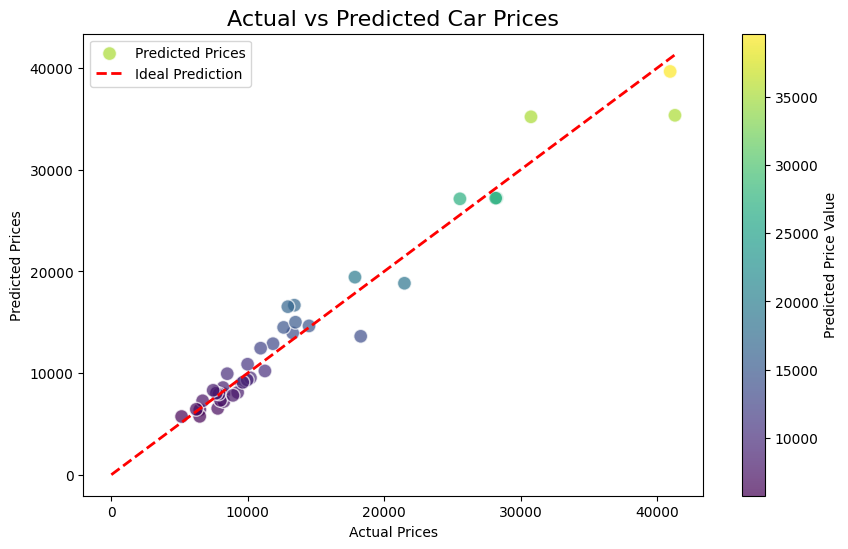

In [80]:
# Visualize actual vs predicted prices with improved clarity
plt.figure(figsize=(10, 6))

# Plot the actual prices
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', label='Predicted Prices', s=100, c=y_pred, cmap='viridis', marker='o')

# Add a reference line for better comparison (y = x line)
max_value = max(y_test.max(), y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

# Customize the plot for clarity
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

plt.colorbar(label='Predicted Price Value', orientation='vertical')  # Adding a color bar
plt.show()


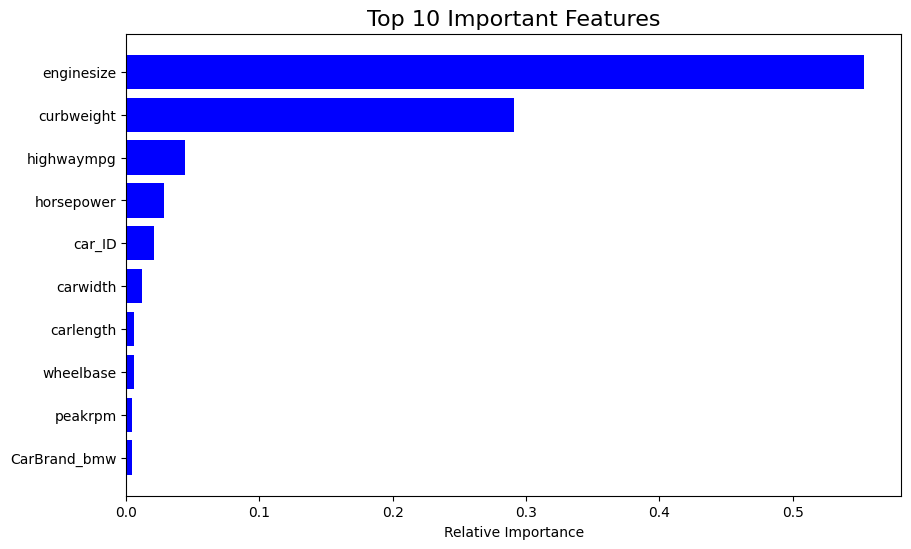

In [81]:
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Important Features', fontsize=16)

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Conclusion</strong></h1>
</div>


<div >
    <h1 style="font-size: 16px;"><strong>
The car price prediction model has demonstrated impressive performance with a Root Mean Squared Error (RMSE) of 1844.19 and an R-squared Score of 0.969. These metrics indicate that the model accurately predicts car prices, capturing a substantial proportion of the variance in the data.

The high R-squared score suggests that our Random Forest model explains a significant amount of the variability in car prices, while the relatively low RMSE indicates that predictions are close to the actual prices. This indicates the effectiveness of our approach in predicting car prices based on various features such as horsepower, car length, and fuel type.

In summary, the model provides valuable insights into car pricing, and its accuracy suggests it can be a reliable tool for understanding and forecasting car prices in real-world scenarios.
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->